In [2]:
using DFTK
using Plots

### Aluminium (Al)

#### Crystal structure

<img src="../../structure/al.png" alt="drawing" width="300" align="left"/>

In [3]:
# inputs

# crystal structure of Aluminium (face-centerd cubic)
convert2bohr = x -> x/0.53           # in-line function
a = b = c = convert2bohr(2.856);# lattice parameters 
a = b = c = 2.856/0.53

positions = [ [0.0, 0.0, 0.0],
              [0.5, 0.5, 0.0],
              [0.5, 0.0, 0.5], 
              [0.0, 0.5, 0.5] ];

lattice = a * [[1 0 0]; 
               [0 1 0];
               [0 0 1]]
lattice = [[a 0 0];
           [0 b 0];
           [0 0 c]];
Al = ElementPsp(:Al, psp=load_psp(:Al, functional="lda"));

atoms = [Al => positions];

In [11]:
@time model = model_LDA(lattice, atoms, temperature=0.01);

  0.068309 seconds (8.13 k allocations: 905.750 KiB)


In [23]:
Ecut = 15 # Ha
@time basis = PlaneWaveBasis(model, Ecut, kgrid=[10, 10, 10])

  1.149122 seconds (82.47 k allocations: 29.961 MiB, 1.67% gc time)


PlaneWaveBasis (Ecut=15.0, 35 kpoints)

In [27]:
@time Al_result = self_consistent_field(basis, tol=1e-10);

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -7.205174863360         NaN   2.90e-01    2.6 
  2   -7.206971654401   -1.80e-03   5.51e-02    1.1 
  3   -7.207149105647   -1.77e-04   1.71e-03    1.9 
  4   -7.207170186119   -2.11e-05   1.52e-04    4.1 
  5   -7.207170233248   -4.71e-08   2.60e-05    4.1 
  6   -7.207170233546   -2.98e-10   4.48e-06    3.9 
  7   -7.207170233554   -8.83e-12   1.95e-07    3.1 
 38.281740 seconds (1.66 M allocations: 1.388 GiB, 1.36% gc time)


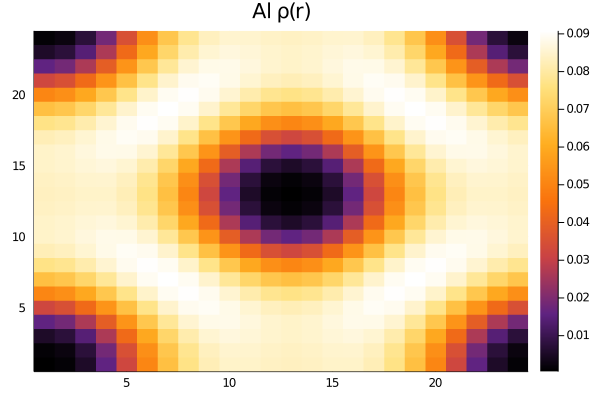

In [31]:
# plot electron density
Al_ρ = heatmap(Al_result.ρ.real[:, :, 1, 1], c=:sunset)
title!("Al ρ(r)")

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:34


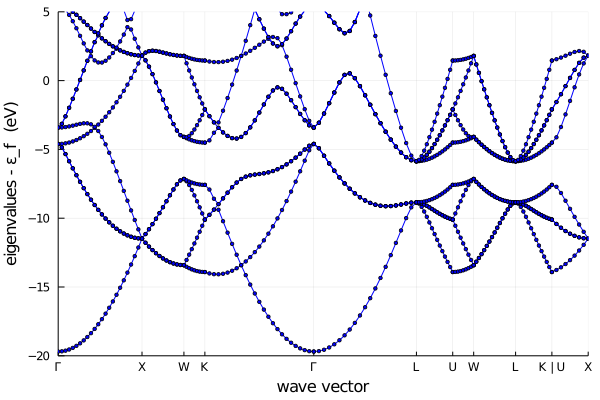

In [34]:
# plot the bands
Al_bands = plot_bandstructure(Al_result, kline_density=10)
plot!(Al_bands, ylim=(-20, 5))

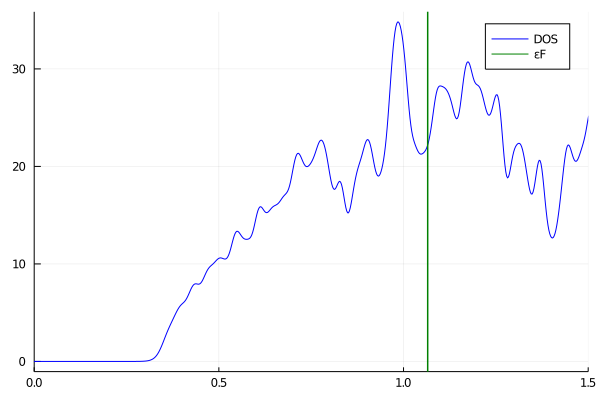

In [36]:
# plot the density of states (dos)
Al_dos = plot_dos(Al_result)
plot!(Al_dos, xlim=(0.0, 1.5))

### Table Salt (NaCl)

#### Crystal structure
<img src="../../structure/nacl.png" alt="drawing" width="300" align="left"/>

In [ ]:

a = b = c = convert2bohr(5.69169);     # lattice parameters
Na_positions = [[0, 0, 0], 
                [0, 0.5, 0.5], 
                [0.5, 0.0, 0.5], 
                [0.5, 0.5, 0.0]];
Cl_positions = [[0.5, 0.0, 0.0], 
                 [0.5, 0.5, 0.5],
                 [0.0, 0.0, 0.5], 
                 [0.0, 0.5, 0.0]];
lattice = [[a 0 0]; [0 b 0]; [0 0 c]]
Na = ElementPsp(:Na, psp=load_psp(:Na, functional="lda"))
Cl = ElementPsp(:Cl, psp=load_psp(:Cl, functional="lda"))
atoms = [Na => Na_positions, Cl => Cl_positions];